<a href="https://colab.research.google.com/github/fatisa2000/hw4/blob/main/Support_Vector_Machines_1_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
!pip install imbalanced-learn

## Section 2. Load Train and Test Dataset

In [4]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
train_data= pd.read_csv('SalaryData_Train.csv')
# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
test_data=pd.read_csv('SalaryData_Test.csv')
# TODO: Display the first 5 or 10 rows of the train_data dataframe
f=train_data.head(10)
print(f)

   age          workclass   education  educationno           maritalstatus  \
0   39          State-gov   Bachelors           13           Never-married   
1   50   Self-emp-not-inc   Bachelors           13      Married-civ-spouse   
2   38            Private     HS-grad            9                Divorced   
3   53            Private        11th            7      Married-civ-spouse   
4   28            Private   Bachelors           13      Married-civ-spouse   
5   37            Private     Masters           14      Married-civ-spouse   
6   49            Private         9th            5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad            9      Married-civ-spouse   
8   31            Private     Masters           14           Never-married   
9   42            Private   Bachelors           13      Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   

## Section 3. EDA

In [5]:
# TODO: Print the shape of the train_data dataframe
print(train_data.shape)

# TODO: Print the shape of the test_data dataframe
print(test_data.shape)

# TODO: Print the information about the train_data dataframe
print(train_data.info())

# TODO Display the summary statistics of the train_data dataframe
dd=train_data.describe()
print(dd)

# TODO: Replace any NaN values in the train_data dataframe with 0
tf=train_data.fillna(0)
print(tf)

# TODO: Print the number of NaN values in each column of the train_data dataframe
num= train_data.isna().sum()
print(num)







(30161, 14)
(15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000 

## Data Visualization

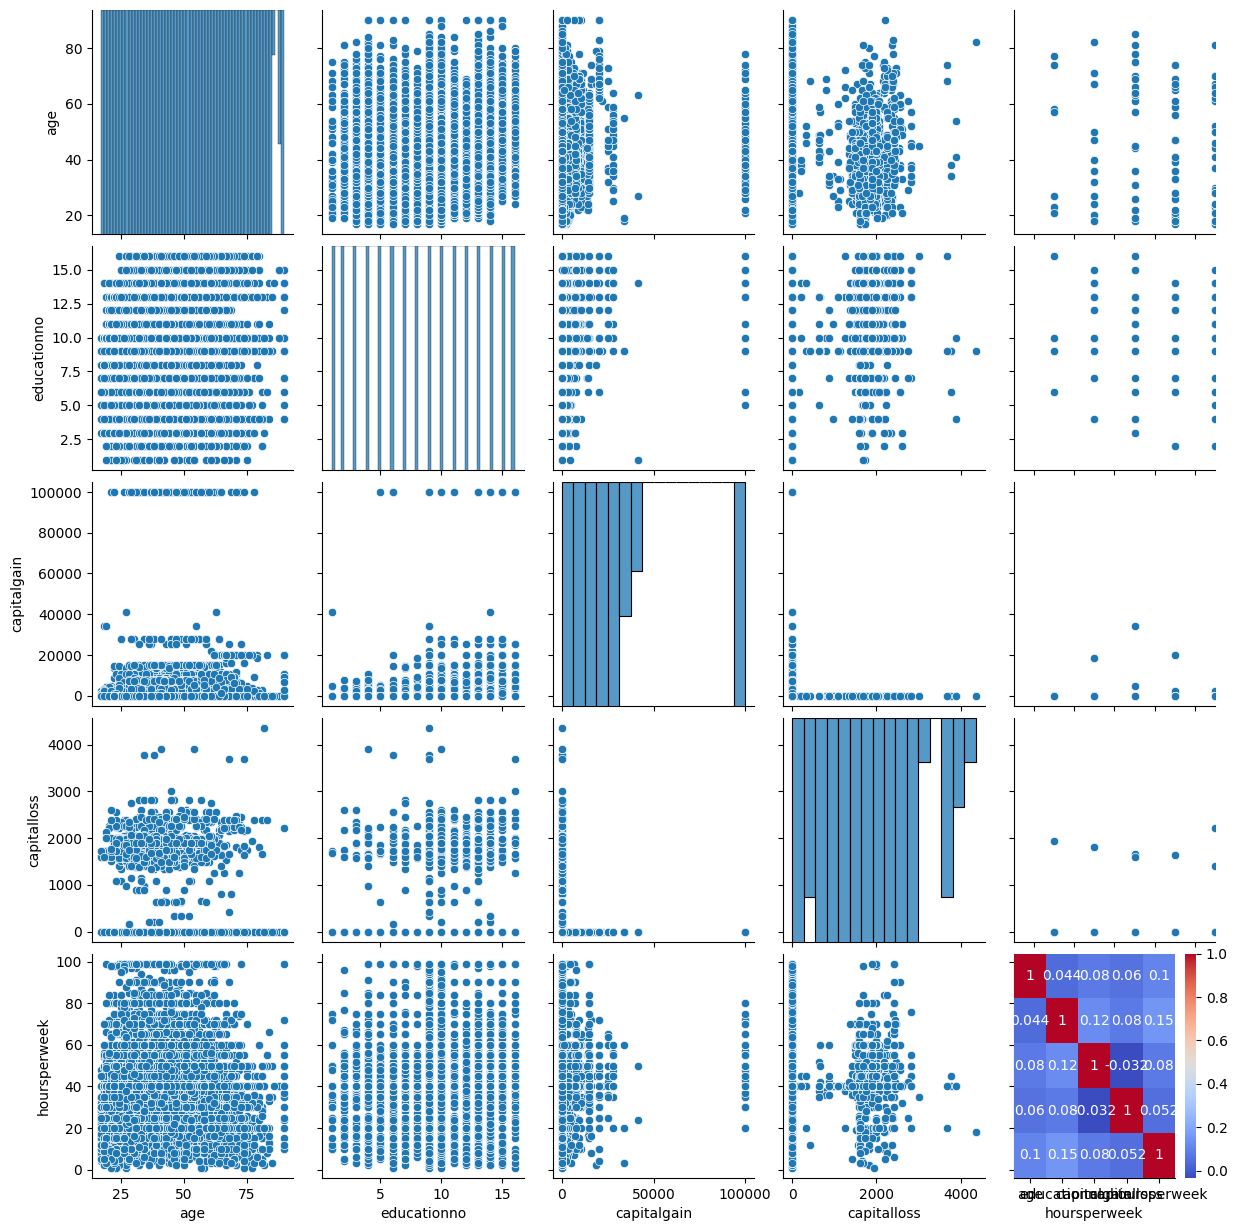

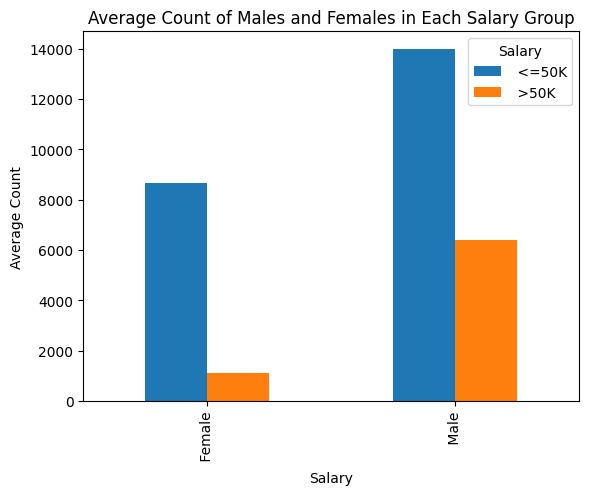

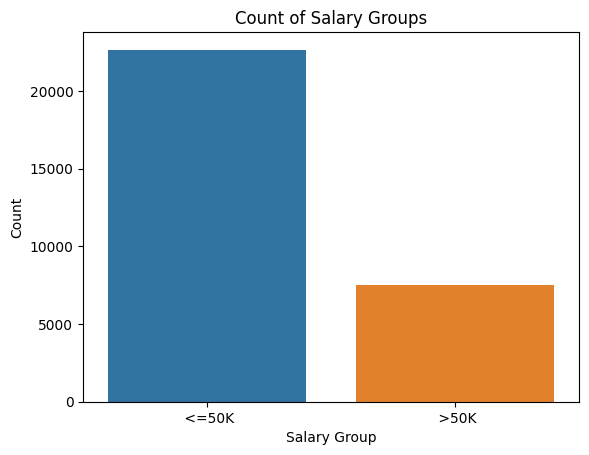

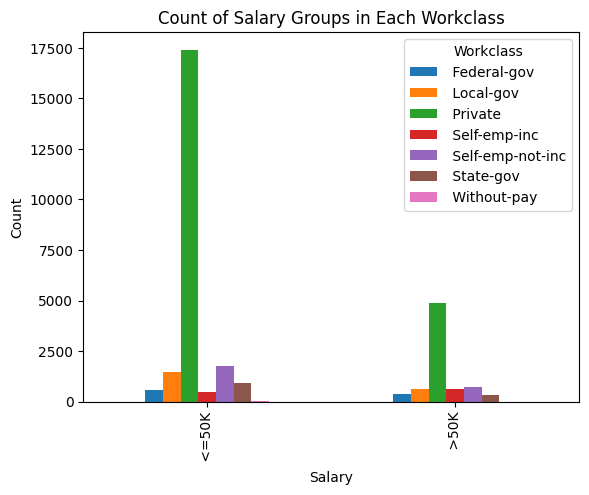

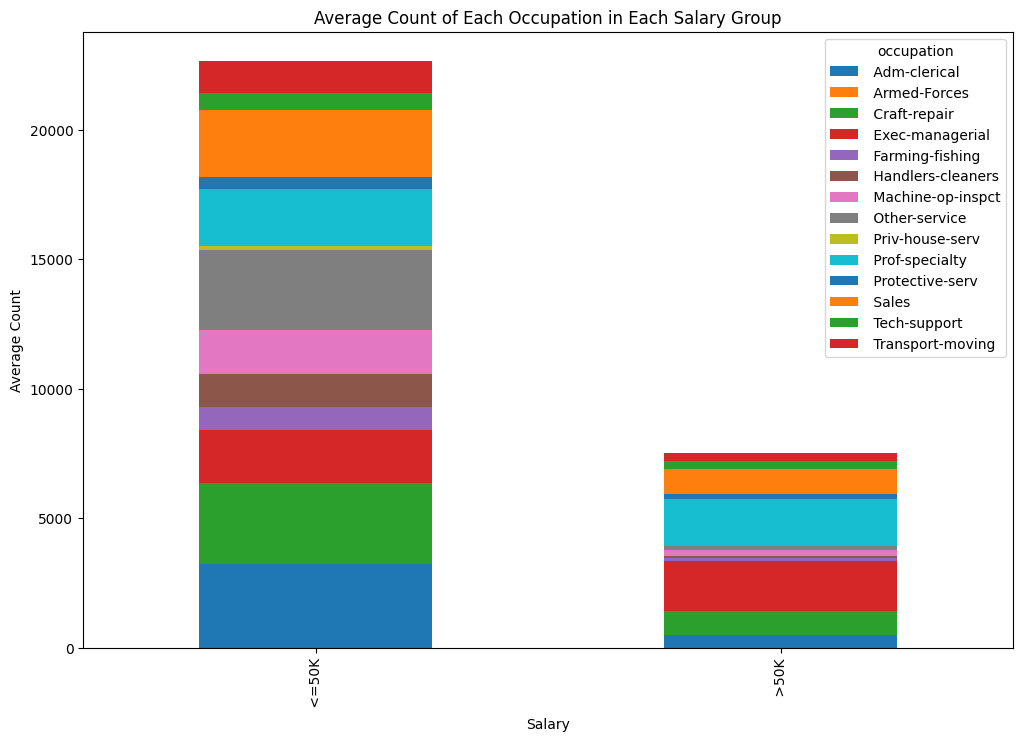

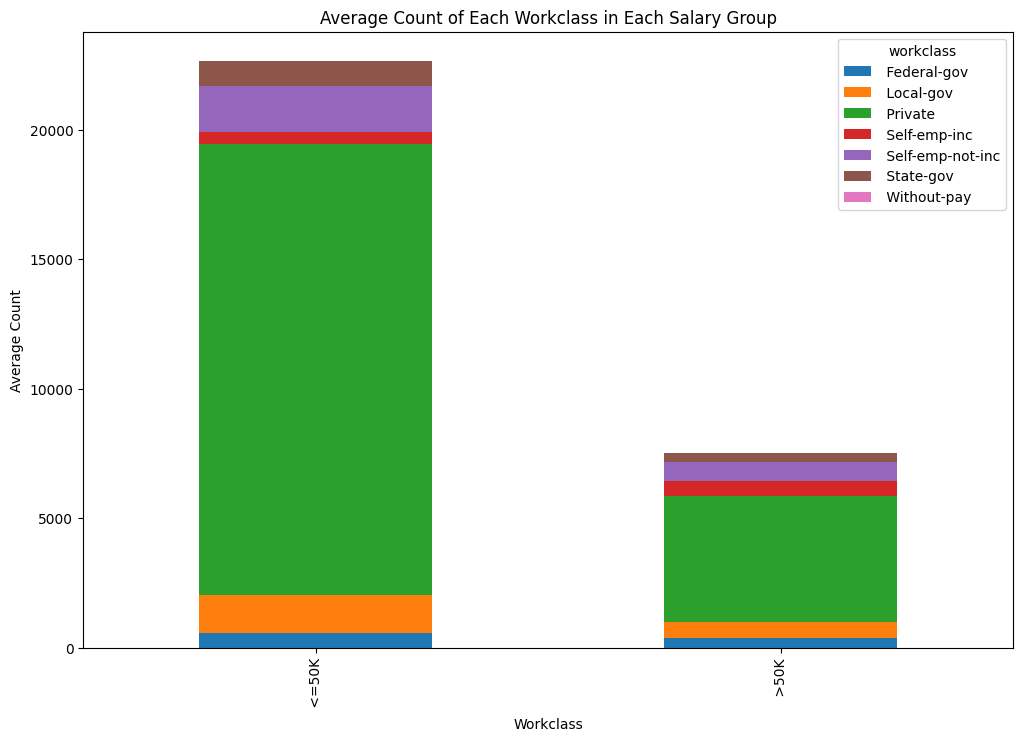

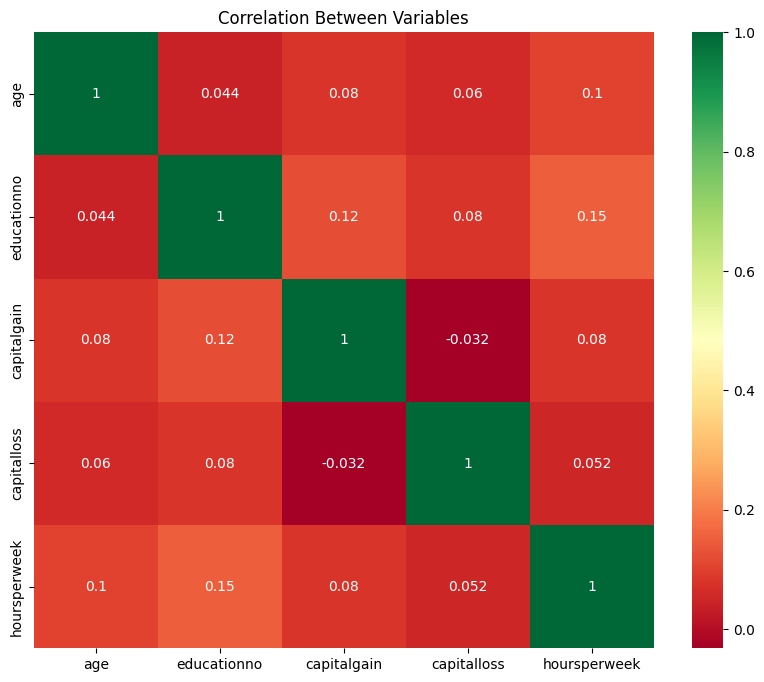

In [6]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
sns.pairplot(train_data)
correlation_matrix =train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# TODO: Plot the average count of males and females in each salary group using a bar plot
ave= train_data.groupby(['sex', 'Salary']).size().unstack()

ax = ave.plot(kind='bar')
ax.set_xlabel('Salary')
ax.set_ylabel('Average Count')
ax.set_title('Average Count of Males and Females in Each Salary Group')
plt.show()

# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(data=train_data, x='Salary')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Count of Salary Groups')
plt.show()

# TODO: Plot the count of each salary group in each workclass using a bar plot
gr= train_data.groupby(['workclass', 'Salary']).size().reset_index(name='count')

piv= gr.pivot(index='Salary', columns='workclass', values='count')


piv.plot(kind='bar')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Count of Salary Groups in Each Workclass')
plt.legend(title='Workclass')
plt.show()

# TODO: Plot the average count of each education level in each salary group using a bar plot
occup=train_data.groupby(['occupation', 'Salary']).size().reset_index(name='count')

piv2 = occup.pivot(index='Salary', columns='occupation', values='count')

piv2.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Salary')
plt.ylabel('Average Count')
plt.title('Average Count of Each Occupation in Each Salary Group')

plt.show()

# TODO: Plot the average count of each workclass in each salary group using a bar plot
avg1 =train_data.groupby(['Salary', 'workclass']).size().reset_index(name='count')
piv3 = avg1.pivot(index='Salary', columns='workclass', values='count')

piv3.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Workclass')
plt.ylabel('Average Count')
plt.title('Average Count of Each Workclass in Each Salary Group')
plt.show()

# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap



correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Between Variables')
plt.show()

###  Outliers Detection

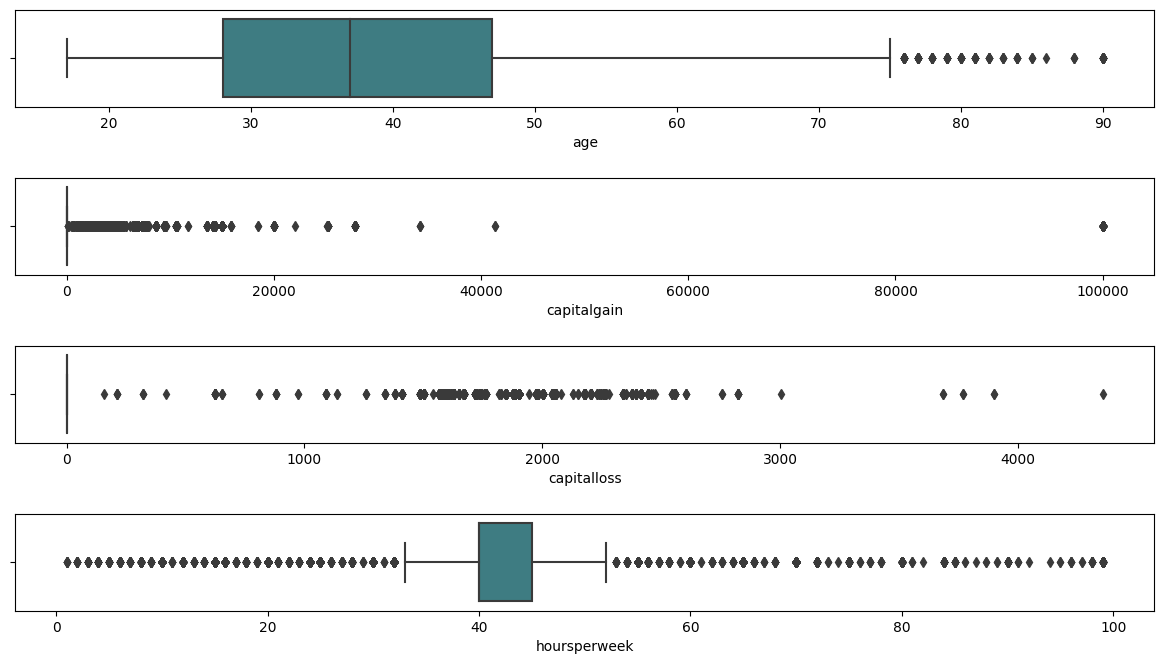

In [7]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

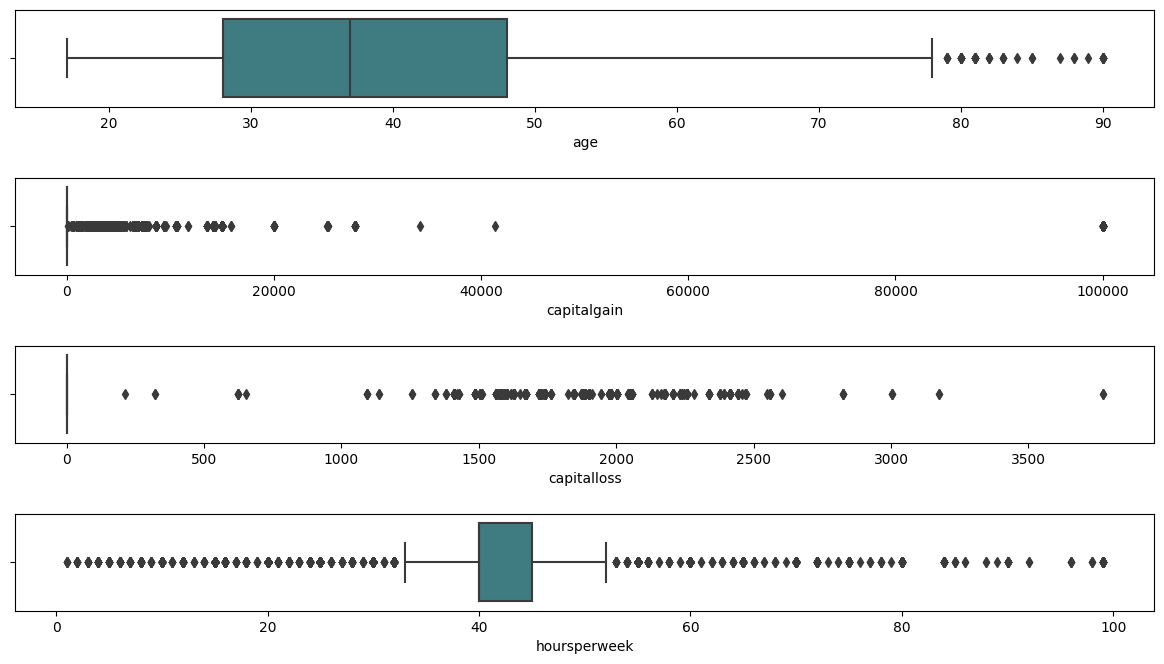

In [8]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [9]:
# TODO: Create a LabelEncoder object
label_encoder = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
for column in train_data.columns:

    if train_data[column].dtype == 'object':
        train_data[column] = label_encoder.fit_transform(train_data[column])
# workclass, education, maritalstatus, occupation, relationship, race, sex, native

# TODO: Display the modified train_data dataframe
print(train_data)

# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
#train_data['Salary'] = [0 if str(value)==a else 1 for value in train_data['Salary']]
print(train_data['Salary'])
# TODO: Do the same preprocessing to test data
for column in test_data.columns:

    if test_data[column].dtype == 'object':
        test_data[column] = label_encoder.fit_transform(test_data[column])
#test_data['Salary'] = [0 if str(value)==a else 1 for value in test_data['Salary']]
print(test_data['Salary'])
print(test_data)

       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0            

## Section 5. Model Building

In [10]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop('Salary', axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary', axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
# TODO: Create a Support Vector Classifier object
svc = SVC()

Shape of X_train: (30161, 13)
Shape of y_train: (30161,)
Shape of X_test: (15060, 13)
Shape of y_test: (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [11]:
# TODO: Train the svc model with X_train and y_train
svc.fit(X_train, y_train)

# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
# TODO: Print the classification report of y_test and y_pred
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
# TODO: Print the training accuracy of the svc model with X_train and y_train
training_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)
# TODO: Print the testing accuracy of the svc model with X_test and y_test
testing_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)


Confusion Matrix:
[[10997   363]
 [ 2703   997]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

Training Accuracy: 0.7960279831570571
Testing Accuracy: 0.7964143426294821


##Section 7. Handling Imbalance Data

In [12]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print(train_data['Salary'].value_counts())
# TODO: Create a SMOTE object
smote = SMOTE()
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
print(X_resampled)
# TODO: Display the resampled y_resampled dataframe
print(y_resampled)
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
counts = y_resampled.value_counts()
print("Count of each unique value in y_resampled:")
print(counts)

0    22653
1     7508
Name: Salary, dtype: int64
       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
45301   45          1         11            9              2          13   
45302   39          2         15           10              1          10   
45303   55          1         12           14              2           9   
45304   43          2         11           10              2           0   
45305   44          0         14           15              0           9   

       relationship  race  sex  capita

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [ ]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
param_grid = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
# TODO: Train the model with resampled X and y dataframes as arguments
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

svc = SVC(C=1, kernel='rbf', gamma=0.1)
svc.fit(X_train, y_train)


# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
print("Predicted y values (y_pred):")
print(y_pred)

# TODO: Print the confusion matrix of y_test and y_pred
con=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(con)
# TODO: Print the classification report of y_test and y_pred
rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(rep)
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
ac = svc.score(X_train, y_train)
print("Accuracy:", ac)
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
ac1 = svc.score(X_test, y_test)
print("Accuracy:", ac1)

## Section 8. Feature Selection

In [13]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function
    sel=SelectKBest(score_func=chi2)
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    sel.fit(X_train, y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs=sel.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs=sel.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, sel

feature 0: score 7927.146247041541
feature 1: score 4.0612612561312185
feature 2: score 264.81580715520585
feature 3: score 2178.3174384441327
feature 4: score 982.2276592748894
feature 5: score 218.59737750505636
feature 6: score 3435.382730752923
feature 7: score 29.339535424884826
feature 8: score 459.2192975768097
feature 9: score 74124662.37626876
feature 10: score 1258785.7692991274
feature 11: score 5569.1940663280375
feature 12: score 16.707319972640118


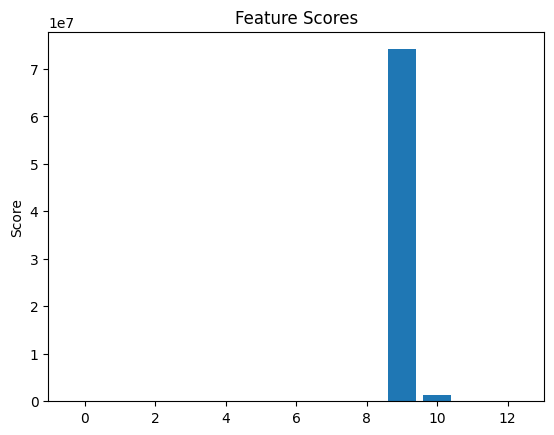

Selected Features:
9
0
6
3
4


In [61]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train,y_train, X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
for f,s in enumerate(fs.scores_):
    print("feature {}: score {}".format(f,s))
# TODO: Create a bar plot of the scores
fi = range(len(fs.scores_))
plt.bar(fi, fs.scores_)
# TODO: Display the bar plot
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()
# TODO Pick out the most relevant features
fi1=range(10)
sort=sorted(zip(fs.scores_,fi1), reverse=True)
k = 5
X_fs1=pd.DataFrame(X_fs)
selectfeature=[X_fs1.columns[idx] for _, idx in sort[:k]]

print("Selected Features:")
for feature in selectfeature:
    print(feature)

In [54]:
print(X_fs1.columns)

RangeIndex(start=0, stop=10, step=1)


In [43]:
# TODO: Create a copy of the train_data dataframe called train_data_copy
train_data_copy = train_data.copy()
# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
missing_percentage = train_data_copy.isnull().sum() / len(train_data_copy) * 100
threshold = 50
irrelevant_columns = missing_percentage[missing_percentage > threshold].index.tolist()

print("Columns with missing values exceeding {}%:".format(threshold))
print(irrelevant_columns)
# Drop the irrelevant columns
train_data_copy.drop(irrelevant_columns, axis=1, inplace=True)
# TODO: Display the train_data_copy dataframe
print(train_data_copy)
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()

missing_percentage1 = test_data_copy.isnull().sum() / len(test_data_copy) * 100
threshold = 50
irrelevant_columns1 = missing_percentage1[missing_percentage1 > threshold].index.tolist()

print("Columns with missing values exceeding {}%:".format(threshold))
print(irrelevant_columns1)
# Drop the irrelevant columns
test_data_copy.drop(irrelevant_columns1, axis=1, inplace=True)
# TODO: Display the train_data_copy dataframe
print(test_data_copy)

Columns with missing values exceeding 50%:
[]
       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalga

## Section 9. Model Training with Highly Relevant Features


In [44]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
# TODO: Train the svc model with X_train and y_train
svc.fit(train_data_copy, y_train)

# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(test_data_copy)
# TODO: Print the confusion matrix of y_test and y_pred
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
# TODO: Print the classification report of y_test and y_pred
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
# TODO: Print the training accuracy of the svc model with X_train and y_train
training_accuracy = svc.score(train_data_copy, y_train)
print("Training Accuracy:", training_accuracy)
# TODO: Print the testing accuracy of the svc model with X_test and y_test
testing_accuracy = svc.score(test_data_copy, y_test)
print("Testing Accuracy:", testing_accuracy)

Confusion Matrix:
[[10997   363]
 [ 2703   997]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

Training Accuracy: 0.7960279831570571
Testing Accuracy: 0.7964143426294821
